## 1. Objective
To predict whether a patient has diabetes based on certain medical predictor variables.

### Project Steps Followed 
1. Define Project Goals/Objective

2. Data Retrieval

3. Data Cleansing

4. Exploratory Data Analysis

5. Data Modeling

6. Result Analysis

## 2. Data Retrieval
The dataset includes several predictors (pregnancies such as BMI, insulin level, age, and so on) and one target variable

The fields are:

1. Pregnancies

2. Glucose

3. BloodPressure

4. SkinThickness

5. Insulin

6. BMI

7. DiabetesPedigree

8. Age

9. Outcome

In [3]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the data

proj_data = pd.read_csv('Parivesh Rohilla - diabetes-data - Parivesh Rohilla - diabetes-data.csv')

In [7]:
# Analysis of Data

proj_data.head() # Print the first 5 rows of the data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [11]:
# Data Type Analysis

proj_data.info() # Check the data types, columns, null value counts, memory usage etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 3. Data Cleansing

In [13]:
# Data Analysis
proj_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [15]:
#transpose
proj_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [17]:
print(proj_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


We notice that the minimum value of certain fields is zero. The zero value for columns such as Glucose, etc does not make sense. This may be due to <b>missing values</b>

The following fields have an invalid zero value

1. Glucose

2. BloodPressure

3. SkinThickness

4. Insulin

5. BMI

We can handle the invalid zero values by replacing them with NaN. This step will help count them easily. We need to replace the zeros with suitable values.

We copy the dataframe to a new dataframe and then replace the zero values in the above given 5 variables with nan.

In [19]:
proj_data_copy = proj_data.copy(deep = True)
proj_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = proj_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [21]:
print(proj_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see that the zero values in the five columns have been updated with nan

Before Updating the nan values with suitable values, we need to understand the data distribution using EDA techniques

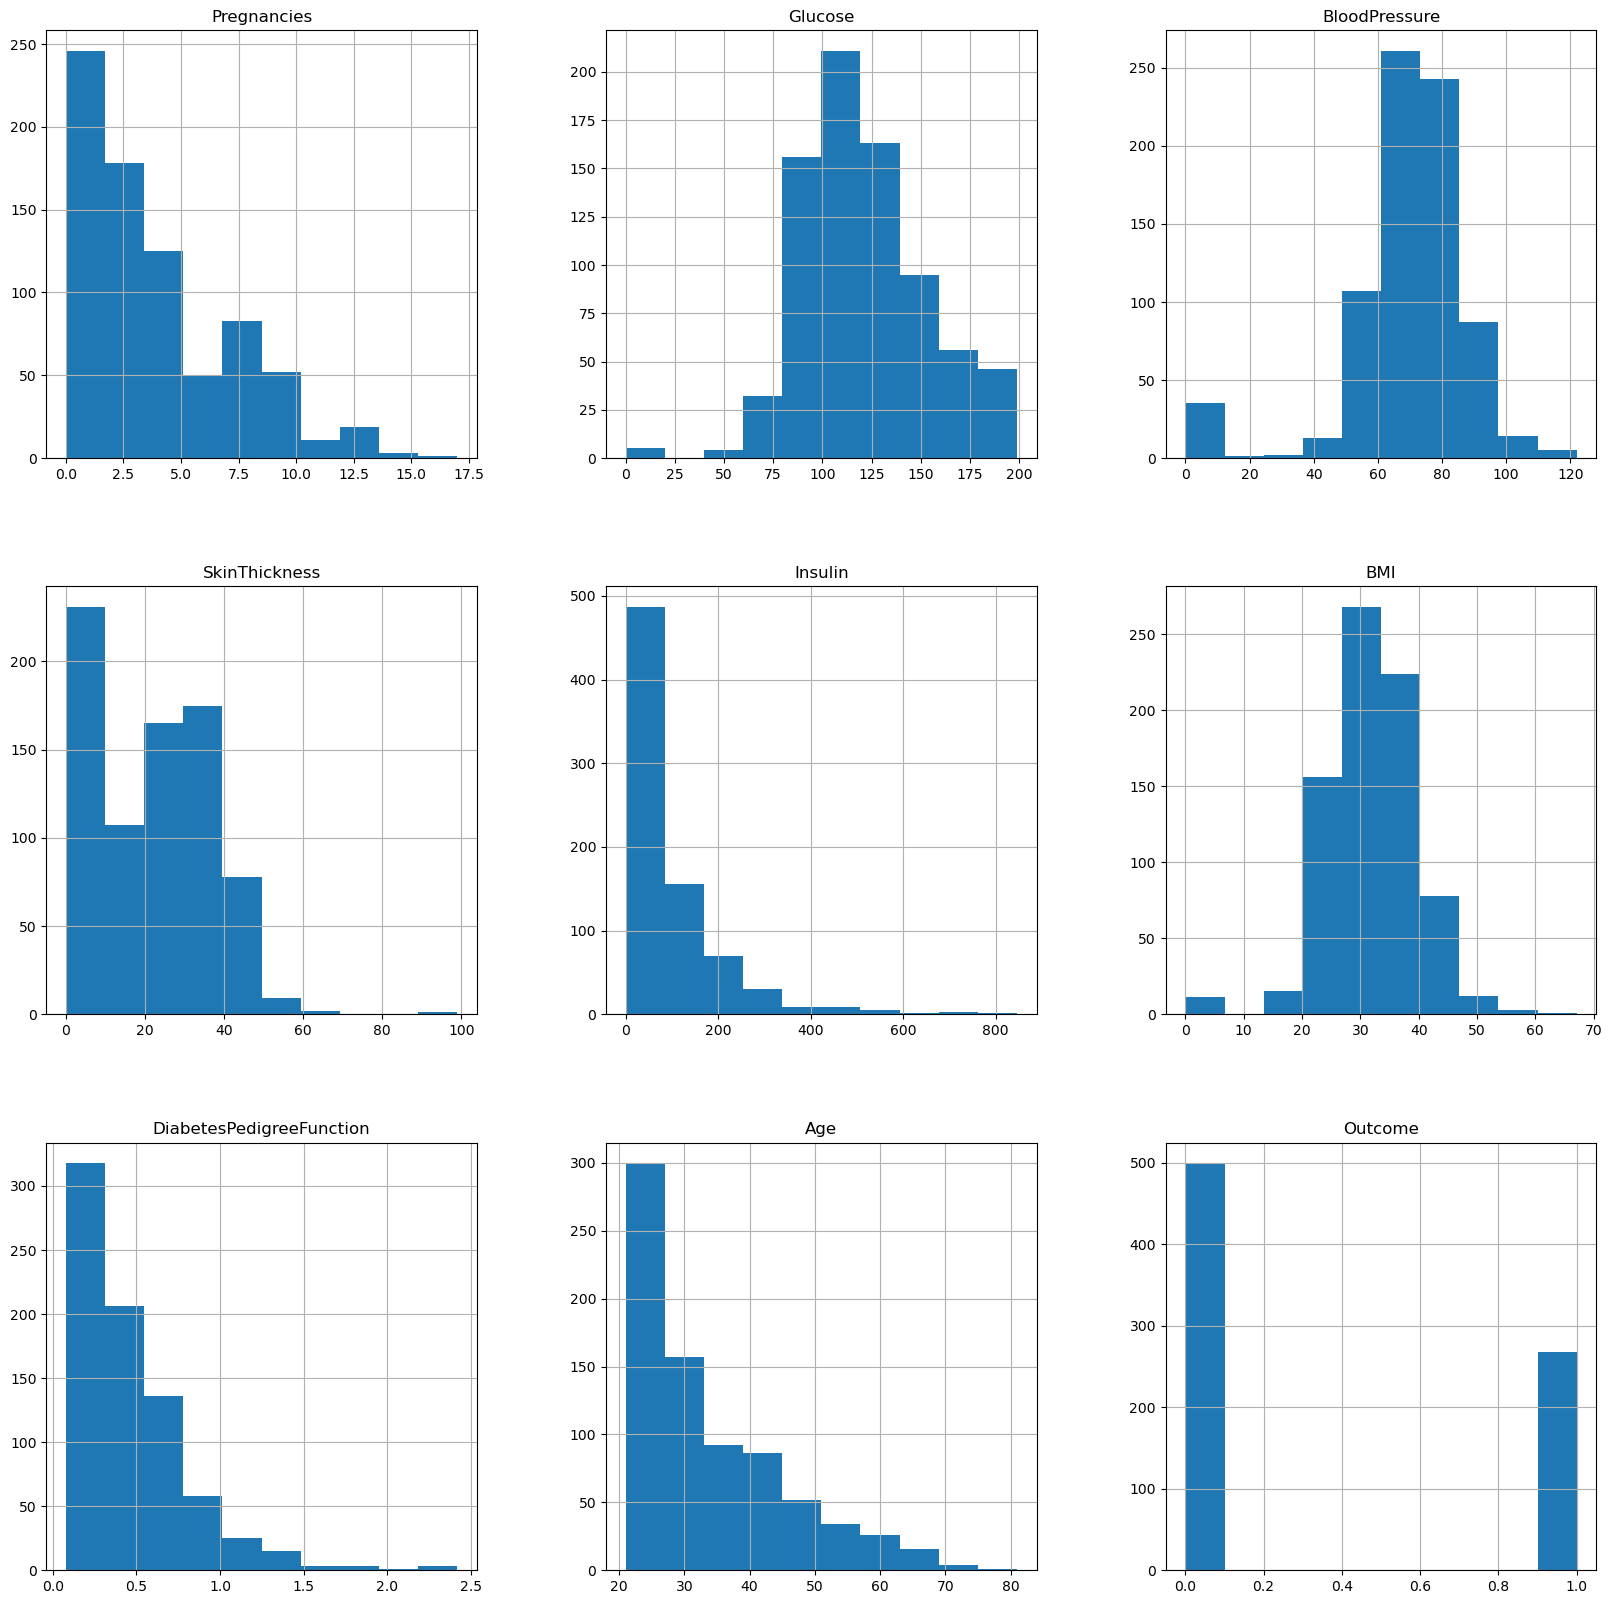

In [23]:
hplot = proj_data.hist(figsize = (20,20))

Now we replace the nan values with the mean value of the variable. This helps to avoid data distortion due to invalid values

For each of the column, the nan value is replaced with mean() value

In [25]:
proj_data_copy['Glucose'].fillna(proj_data_copy['Glucose'].mean(), inplace = True)
proj_data_copy['BloodPressure'].fillna(proj_data_copy['BloodPressure'].mean(), inplace = True)
proj_data_copy['SkinThickness'].fillna(proj_data_copy['SkinThickness'].median(), inplace = True)
proj_data_copy['Insulin'].fillna(proj_data_copy['Insulin'].median(), inplace = True)
proj_data_copy['BMI'].fillna(proj_data_copy['BMI'].median(), inplace = True)

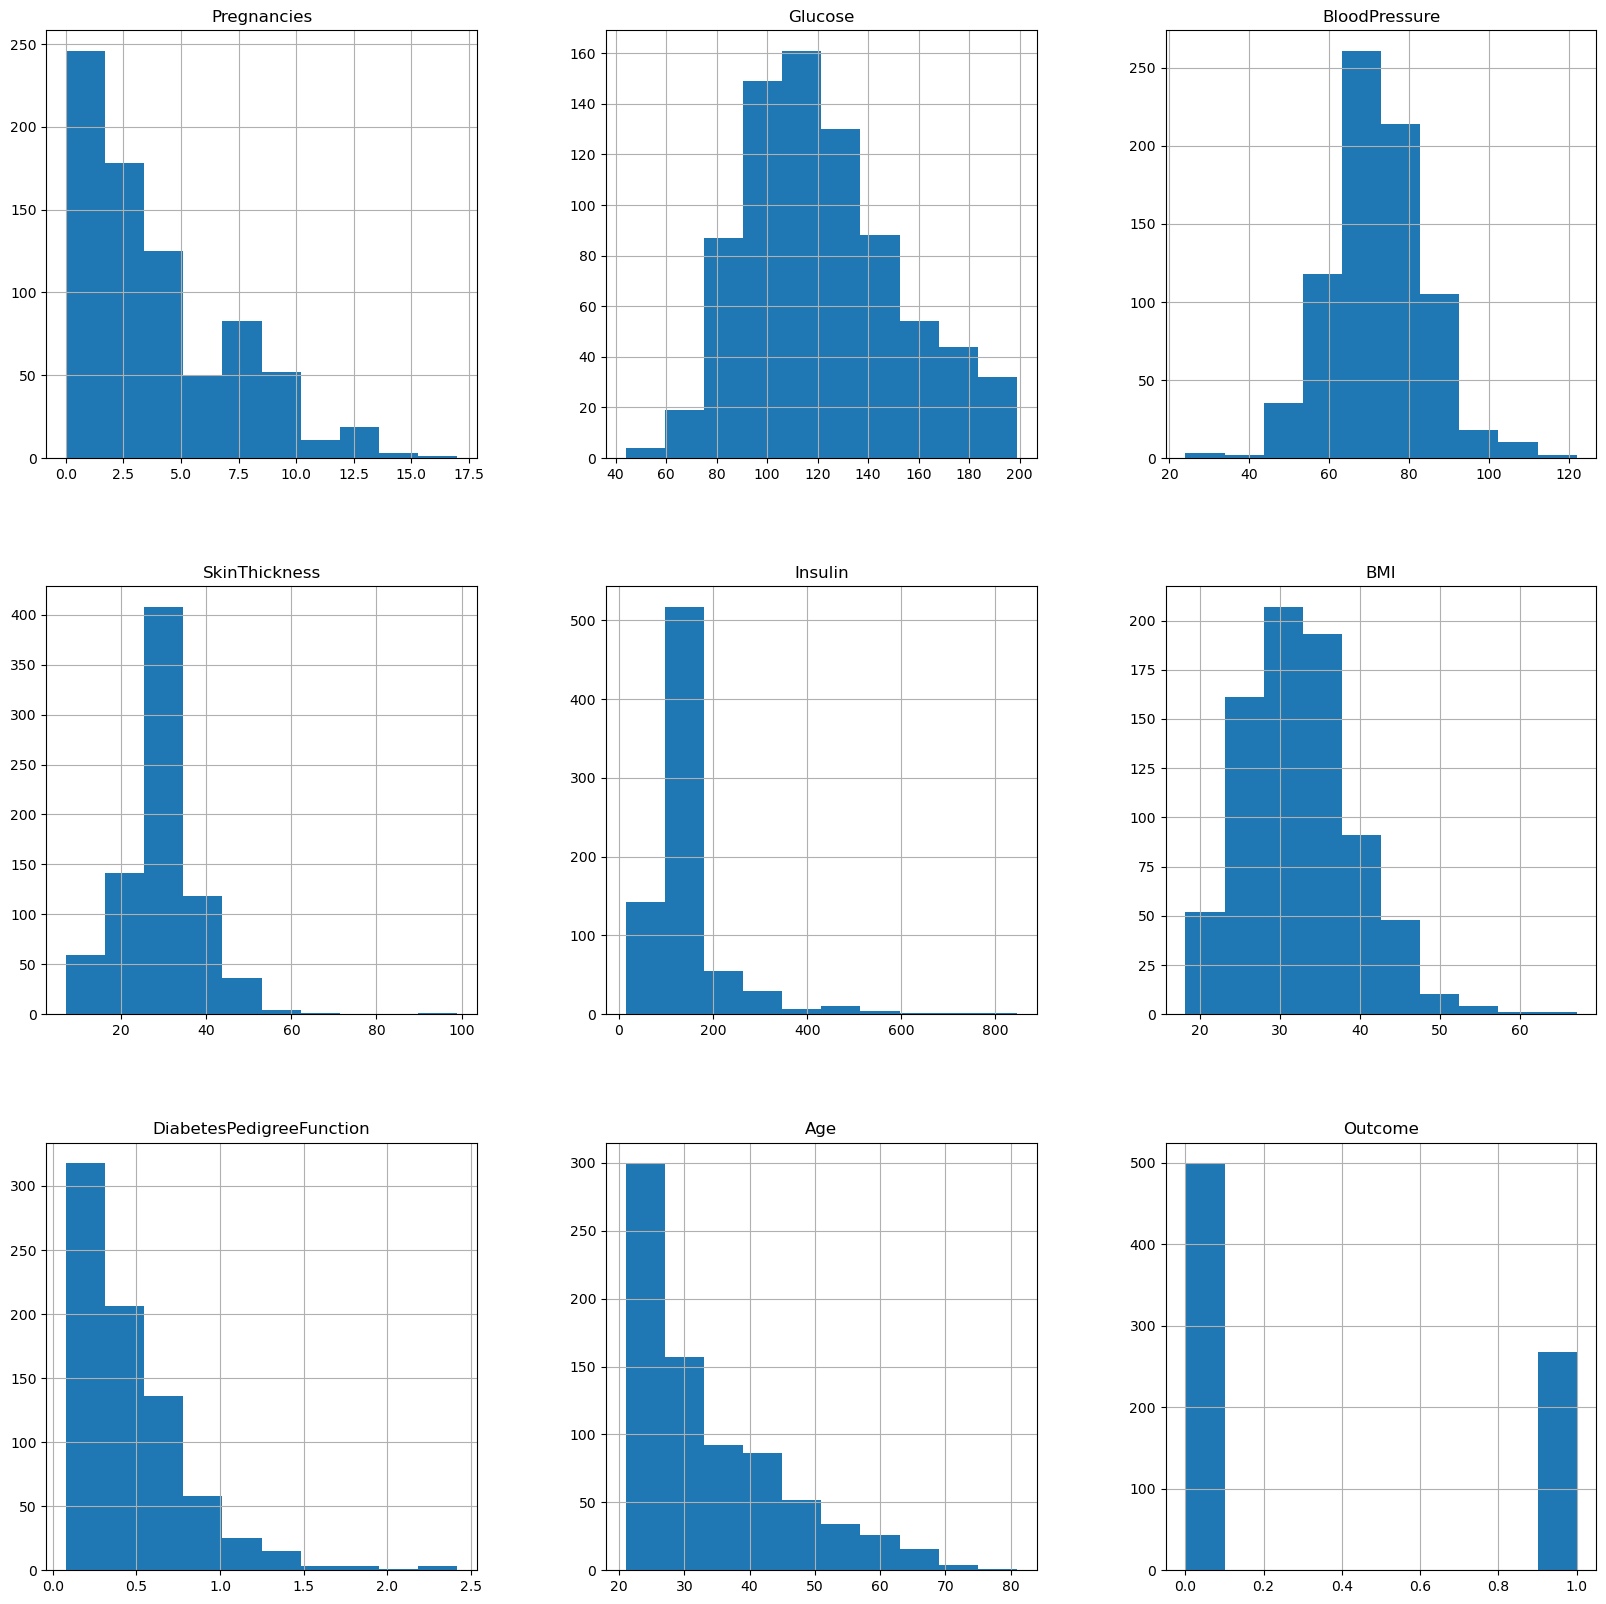

In [27]:
hplot = proj_data_copy.hist(figsize = (20,20))

## 4. Exploratory Data Analysis(EDA)

In [29]:
# Analyze the shape of the data

proj_data.shape

(768, 9)

In [30]:
# Analyze the Outcome Variable

print(proj_data.Outcome.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


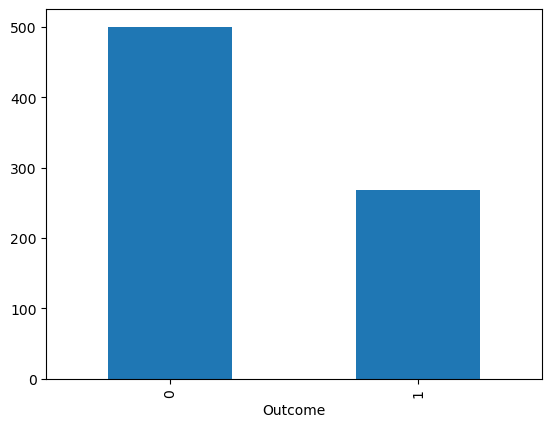

In [31]:
p=proj_data.Outcome.value_counts().plot(kind="bar")

It shows that the Outcome variable is binary and hence categorical. Value 0 represents the "Non-Diabetics" category whereas value 1 represents the "Diabetics" category. The counts of the "Non-Diabetics" category is approximately twice than that of the "Diabetics" category"

Since the outcome variable is categorical, we can use the classification methods such as KNN

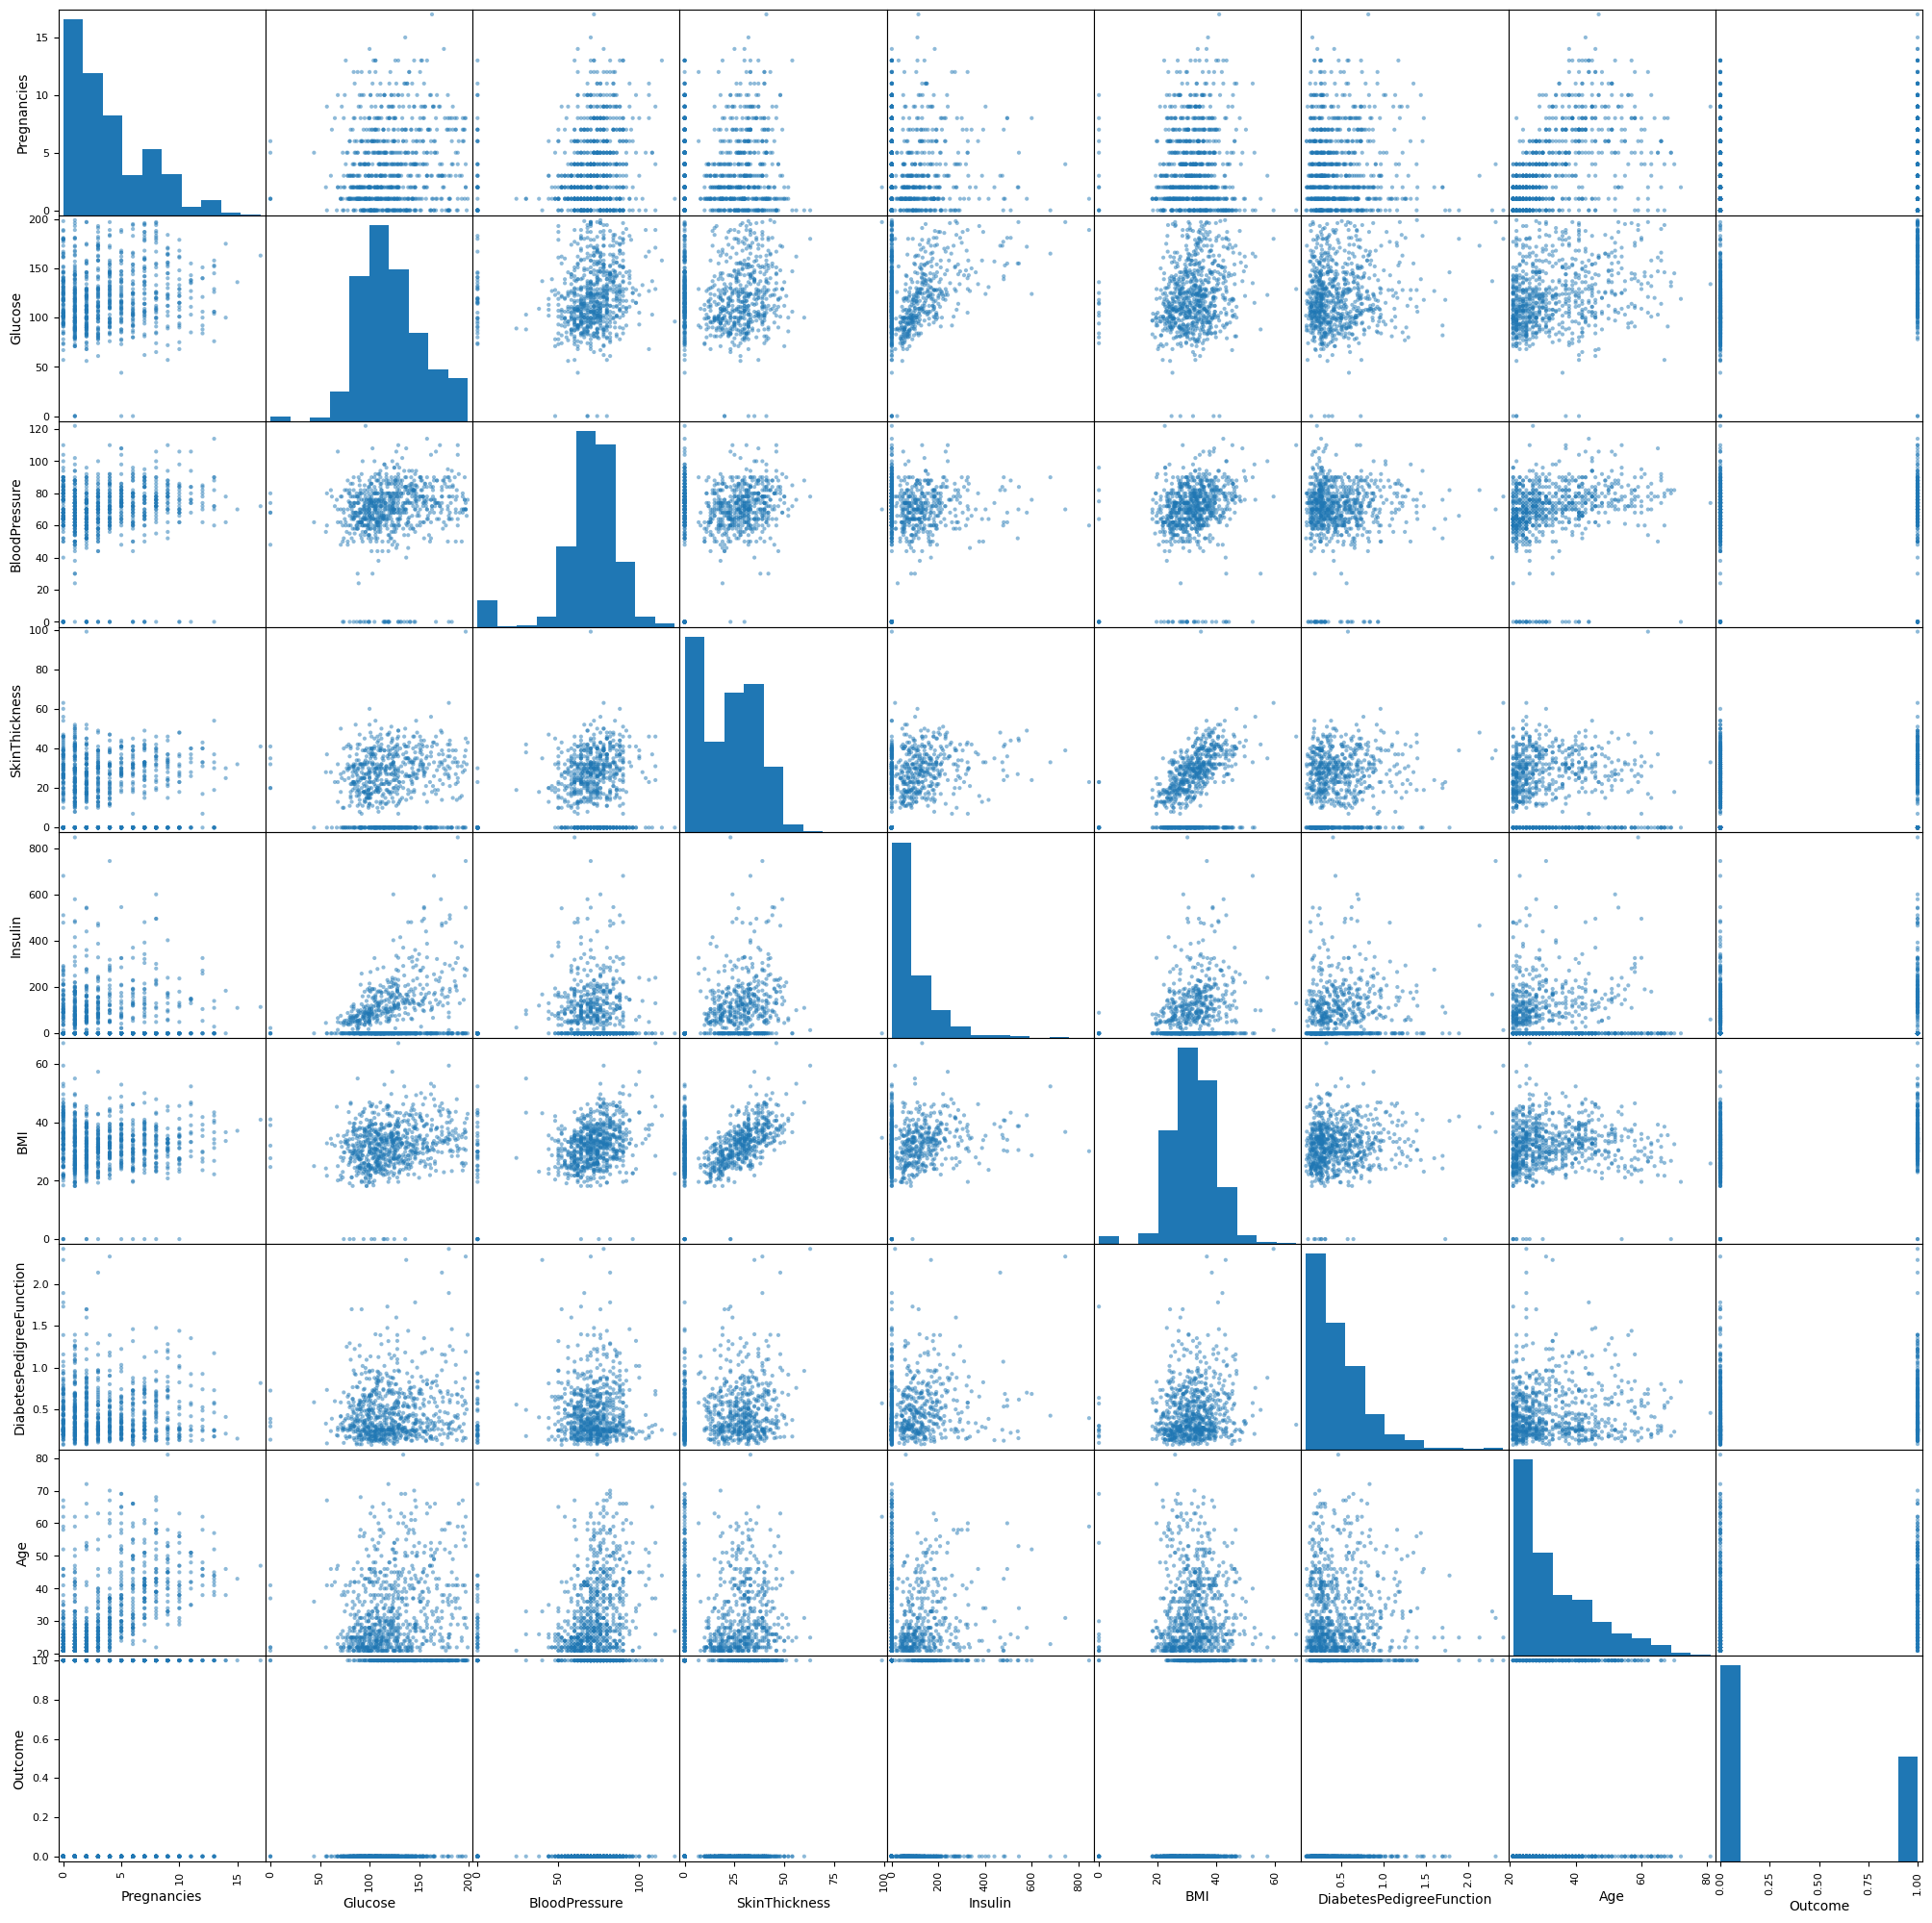

In [35]:
# Scatter Matrix of unclean data

from pandas.plotting import scatter_matrix
p=scatter_matrix(proj_data,figsize=(25, 25))

The pair plot inclused histogram as well as scatter plot. The histogram is on the diagonal whereas the scatter plot is off-diagonal. The histogram shows the distribution of a single variable whereas the scatter plot shows the relationship between two variable

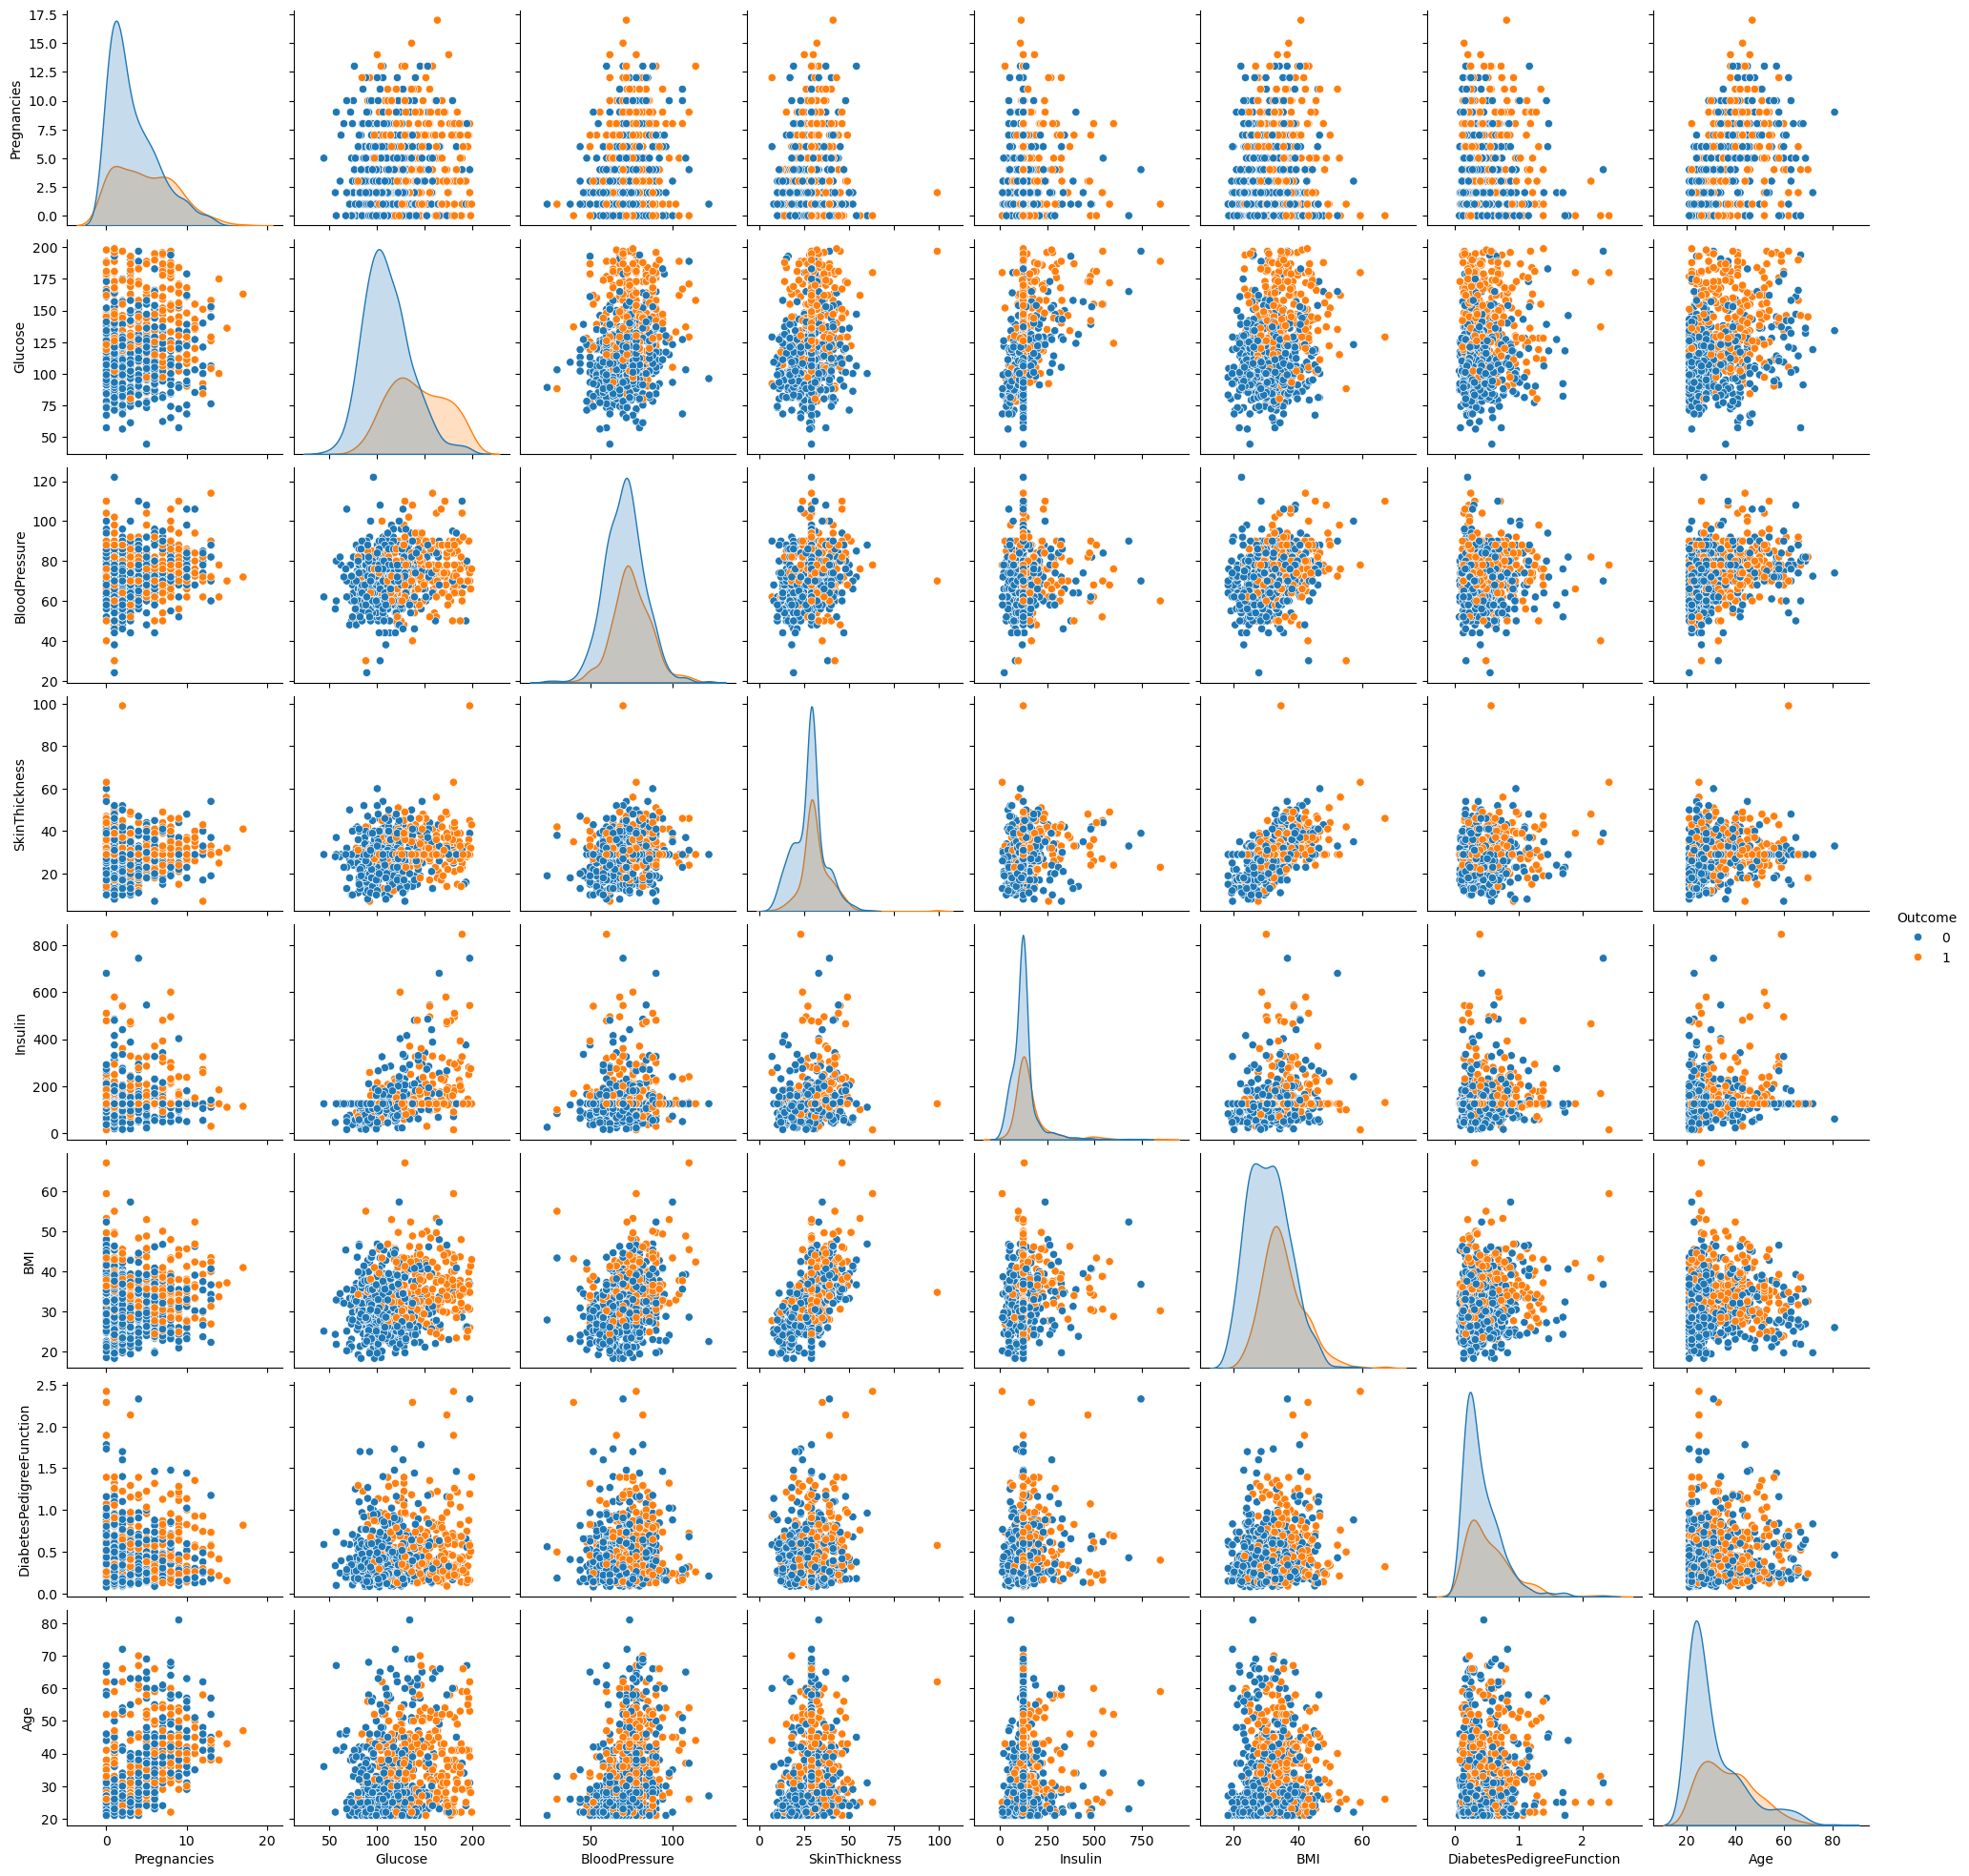

In [37]:
# Pair Plot of Clean Data

p=sns.pairplot(proj_data_copy, hue = 'Outcome')

###  Pearson's Correlation Coefficient
You can use Pearson's Correlation Coefficient to analyze the correlation between the variables. The value of Pearson's Correlation Coefficient varies between -1 to +1. 1 means high correlation whereas 0 means no correlation.

We can construct a heat map to visualize the correlation matrix.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

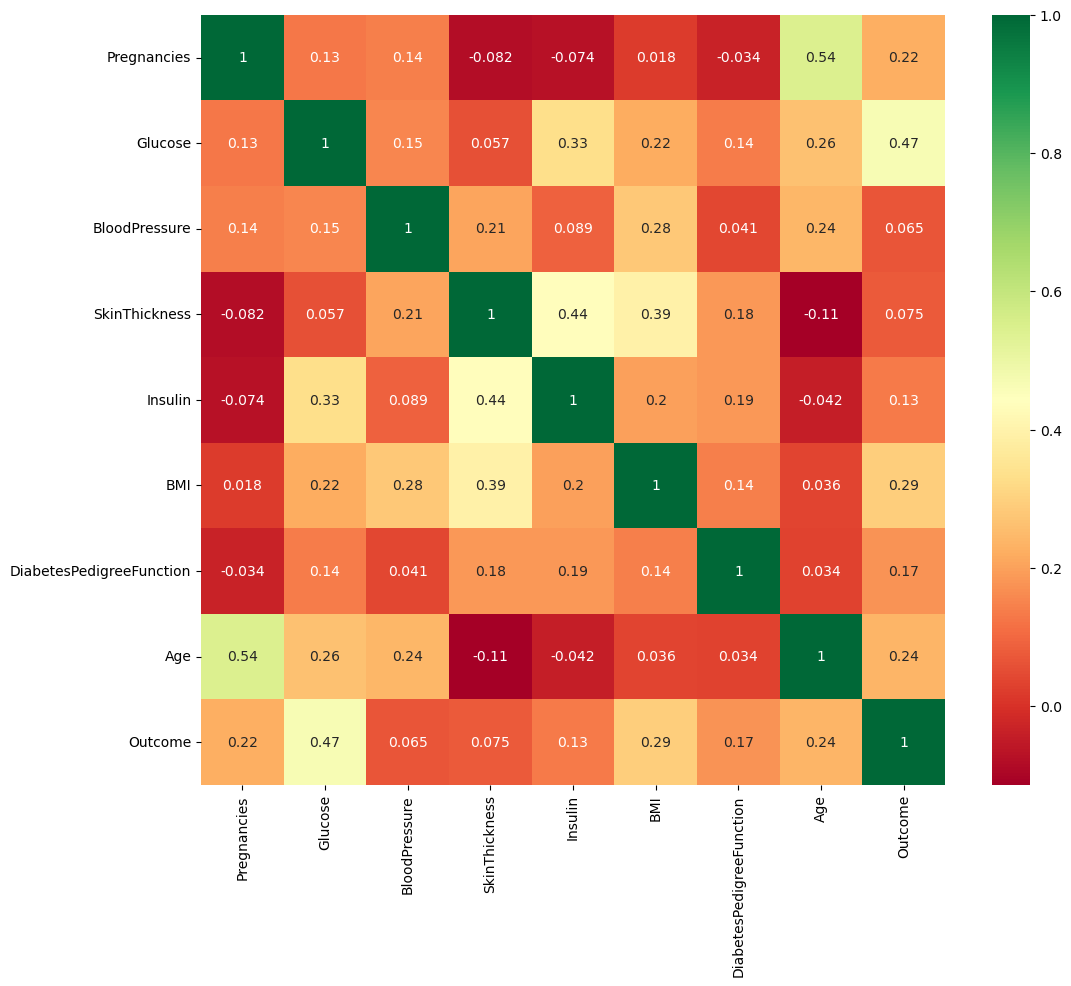

In [41]:
# Construct heat map for unclean data

plt.figure(figsize=(12,10))
p=sns.heatmap(proj_data.corr(), annot=True,cmap ='RdYlGn')
print(proj_data.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021559  0.231128       0.281199       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419064  0.231

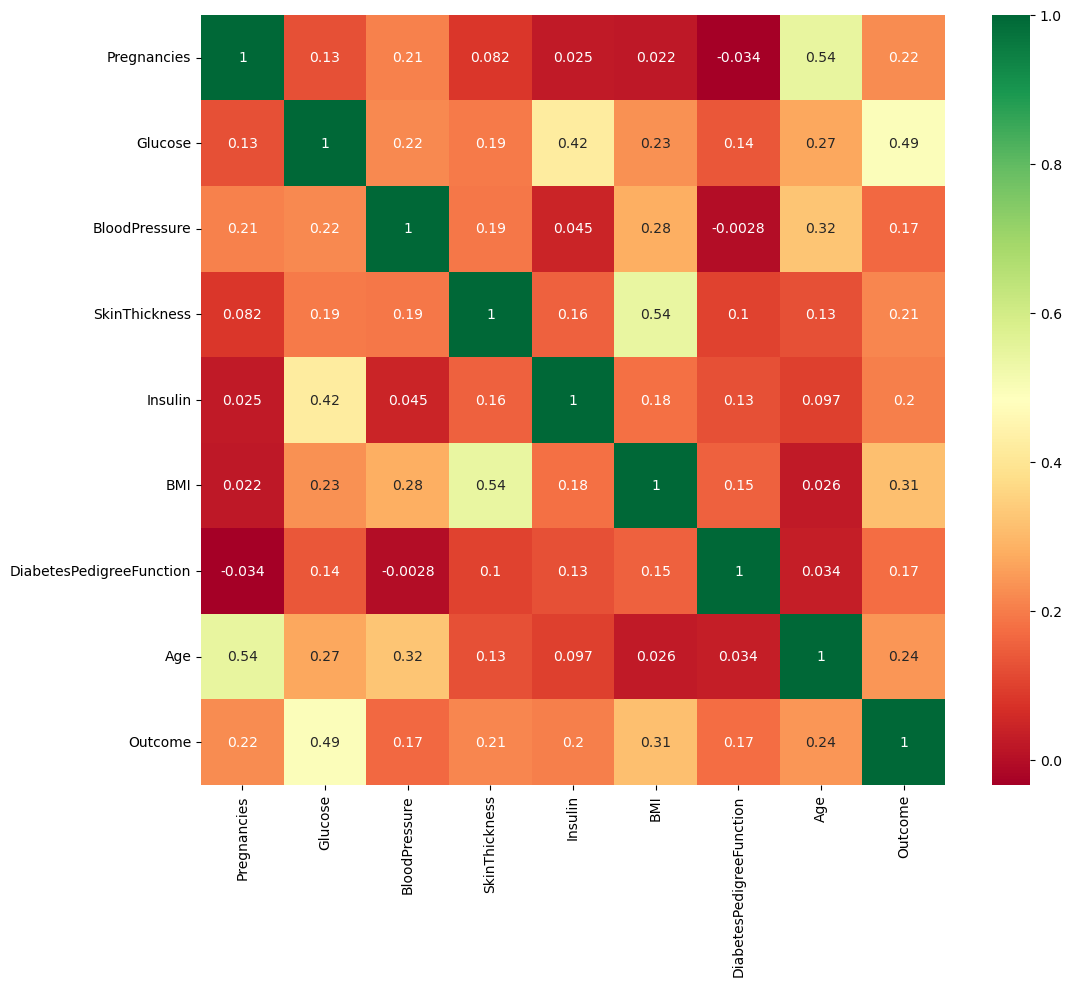

In [43]:
# Construct heat map for clean data

plt.figure(figsize=(12,10))
p=sns.heatmap(proj_data_copy.corr(), annot=True,cmap ='RdYlGn')
print(proj_data_copy.corr())

We can observe the following

1. Change in heatmap due to data cleansing activities

2. Correlation between Outcome and other input variables

3. The highest correlation is between glucose level and outcome (0.49)

4. The lowest correlation is between Blood Pressure and Outcome (0.17)

## 5. Scaling and Train Test Split
### Scaling
Data scaling is an important step. The preprocessed data may contain variables with different value ranges for various quantities such as dollars, kilograms, and sales volume. The machine learning models are more effective if the attributes have the same scale

Two important methods of scaling are:

1. Normalization

2. Standardization

#### Normalization: 
Normalization refers to rescaling real-valued numeric attributes into the range 0 and 1. We use sklearn.preprocessing.normalize() for Normalization. The mathematical formula is

$ z=\frac{x-\textrm{min}(x)}{\textrm{max}(x)-\textrm{min}(x)} $

#### Standardization: 
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). The mathematical formula is

$ z=\frac{x_i-\mu}{\sigma} $

In this case we would follow the following steps

1. from sklearn.preprocessing import StandardScaler
2. Initialize the StandardScaler
3. Fit Data to Scaler Object

In [47]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()

X = scale_X.fit_transform(proj_data_copy.drop(["Outcome"],axis = 1),)
X = pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])



In [49]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [57]:
y = proj_data_copy.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<u>Note</u>: It is always advisable to bring all the attributes at the same scale for models such as KNN. The attributes or features with greater range will overshadow or diminish the smaller attributes/feature completely. Hence it will impact the performance of the model because it will give higher weightage to attributes with higher magnitude.

### Train Test Split
Before fitting the data to the machine learning model, we should split the data into training data and testing data. This is an important step because we would like to train the model by fitting the training data. But to test the data, we should use the data that is new to model. Then only we would be able to calculate the performance of the model on the unseen data.

We use sklearn.model_selection.train_test_split() method for Train Test Split.

The first parameter of the train_test_split is test_size which specifies the ratio of data in the test dataset and test dataset. The value $ \frac{1}{3} $ will put one-third values in the test data set and two-thirds values in the training data set.

The second parameter is random_state. Before splitting the data into training and test datasets, the data is randomly shuffled. By giving a value for the random state we ensure, the data is shuffled in a similar way every time so that you get the consistent training and test dataset.

The third parameter is stratify. Stratify parameter ensures that the proportion of values in the training and test data set will be the same as the proportion of values in the master dataset. For example, if variable y is a binary categorical variable with values 0 and 1. Suppose there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [92]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

## 6. Data Modeling
For KNN, we will use sklearn.neighbors.KNeighborsClassifier method. and fit the X_train, y_train, X_test, and y_test datasets that we got from the train-test-split step

We have used a for loop to fit the data on KNN model with $ K=1, \ldots 15 $ and store the scores

In [95]:
from sklearn.neighbors import KNeighborsClassifier 
testing_score = []
training_score = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    training_score.append(knn.score(X_train,y_train))
    testing_score.append(knn.score(X_test,y_test))

We find out the value of K for which the training accuracy was the highest

In [97]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print('Max training score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max training score 100.0 % and k = [1]


From the results, we can see that the training accuracy was 100% for K = 1. As we have seen from the text, KNN is highly flexible when K = 1

We find out the value of K for which the test accuracy was the highest

In [99]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max testing score 76.5625 % and k = [11]


The testing accuracy $ 76.5625\% $ is highest with K = 11

Hence for the given data set, we can select the KNN with K = 11

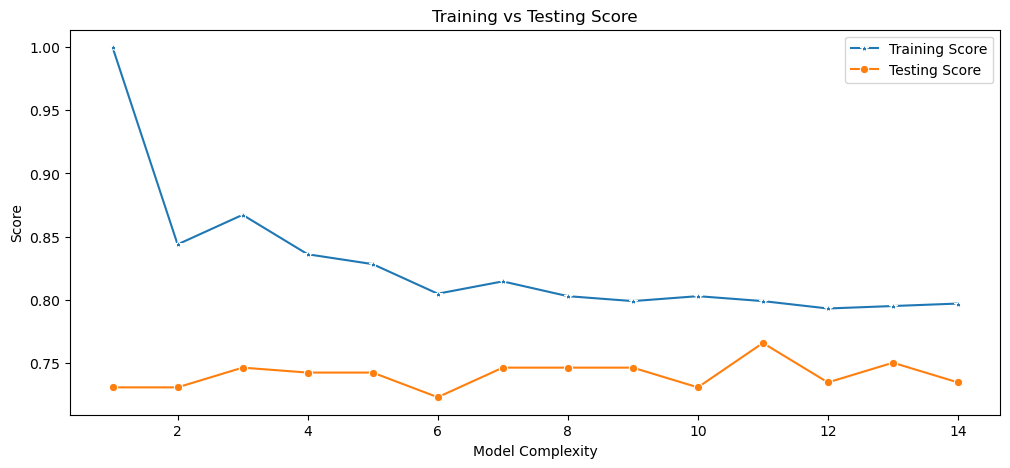

In [101]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1, 15), y=training_score, marker='*', label='Training Score')
sns.lineplot(x=range(1, 15), y=testing_score, marker='o', label='Testing Score')
plt.xlabel("Model Complexity")
plt.ylabel("Score")
plt.title("Training vs Testing Score")
plt.legend()
plt.show()

We can see that the highest testing accuracy is with K = 11. We can build our KNN model with K = 11.

In [115]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [179]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.27386138936982773